## DILANI WIDANAPATHIRANAGE
## 190692E

In [4]:
import cv2 as cv
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import random
import matplotlib.pyplot as plt
from scipy import optimize

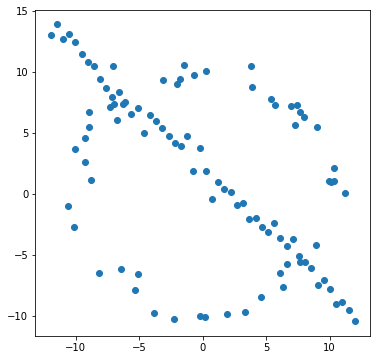

In [2]:
import numpy as np
from scipy . optimize import minimize,curve_fit
from scipy import linalg
import matplotlib . pyplot as plt
# np . random . seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np.hstack ( (x.reshape ( half_n , 1 ) , y.reshape( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )
fig,ax=plt.subplots(1,1,figsize=(6,6))
plt.scatter(X[:,0],X[:,1])

Center of Sample= (0.3875662946664744, 0.20783294446043665)
Radius of Sample= 9.79406671357652
Ratio of inliers = 84.0 %
Center of RANSAC = (0.11145660376803412, 0.08177822844398985)
Radius of RANSAC = 9.895950353692601


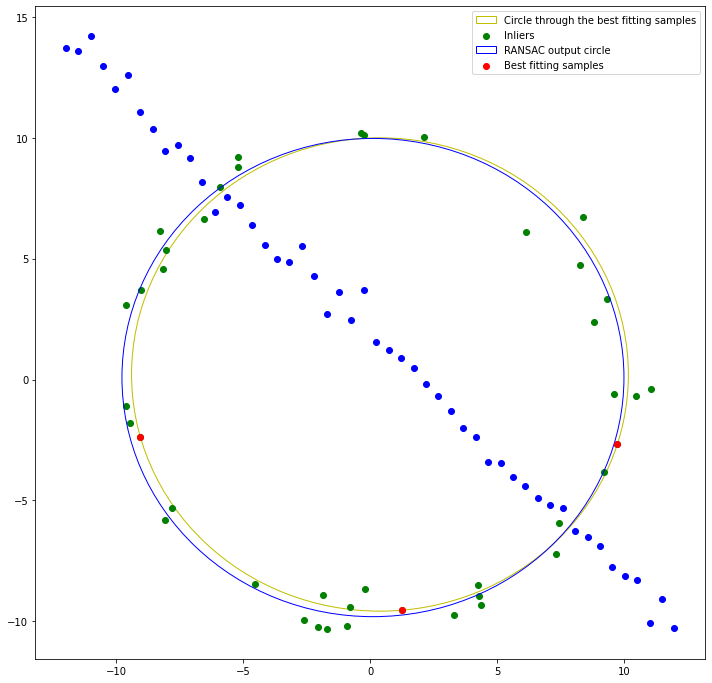

In [17]:
np.random.seed(6)
N = 100
half_n = N // 2
r = 10
s = r / 16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x , y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
# https://stackoverflow.com/questions/28910718/give-3-points-and-a-plot-circle
def define_circle(list):
    p1=list[0]
    p2=list[1]
    p3=list[2]
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    # Center of circle
    cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    return ((cx, cy), radius)
#center and radius of the circle passing the given 3 points.
def model_circle(point_list):
   
    p1,p2,p3 = point_list[0], point_list[1], point_list[2]
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    # Center of circle
    cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    return ((cx, cy), radius)

#get random samples
def random_sample(data_list):
    sample_list = []
    random.seed(0)
    rand_nums = random.sample(range(1, len(data_list)), 3)
    for i in rand_nums:
        sample_list.append(data_list[i])
    return np.array(sample_list)

def get_inliers(data_list, center, r):
    inliers = []
    threshold = r//5

    for i in range(len(data_list)):
        error = np.sqrt((data_list[i][0]-center[0])**2 + (data_list[i][1]-center[1])**2) - r
        if error < threshold:
            inliers.append(data_list[i])

    return np.array(inliers)

def algebric_distance(c, x_data, y_data):
    
    Ri= np.sqrt((x_data-c[0])**2 + (y_data-c[1])**2)
    return Ri - Ri.mean()

def estimateCircle(x_m, y_m, points):
    x_1 = points[:,0]
    y_1 = points[:,1]
    center_estimate = x_m, y_m
    center_2, ier = optimize.leastsq(algebric_distance, center_estimate, (x_1, y_1))

    xc_2, yc_2 = center_2
    Ri_2= np.sqrt((x_1-center_2[0])**2 + (y_1-center_2[1])**2)
    R_2 = Ri_2.mean()
    return (xc_2, yc_2), R_2
# RANSAC
def RANSAC(data_list, count):
   
    best_sample = []
    best_center_sample = (0,0)
    best_radius_sample = 0
    best_inliers = []
    max_inliers = 0
    
    for i in range(count):
        samples = random_sample(data_list)  
        center, radius = model_circle(samples) 
        inliers = get_inliers(data_list, center, radius)
        num_inliers = len(inliers)

        if num_inliers > max_inliers:
            best_sample = samples
            max_inliers = num_inliers
            best_center_sample = center
            best_radius_sample = radius
            best_inliers = inliers

    print("Center of Sample=", best_center_sample)
    print("Radius of Sample=", best_radius_sample)

    return best_center_sample, best_radius_sample, best_sample, best_inliers



#Ransac
center, radius, sample, inliers = RANSAC(X_circ, 20000)

fig,ax = plt.subplots(1,1, figsize = (12,12))
circle = plt.Circle(center, radius, fill = False, label = "Circle through the best fitting samples", color = 'y')
ax.add_patch(circle)
print("Ratio of inliers =",len(inliers)/half_n*100, "%")
ax.scatter(inliers[:,0], inliers[:,1], color = 'green', label = "Inliers")
ax.scatter(X_line[:, 0], X_line[:, 1], c='blue')
ransac_center, ransac_radius = estimateCircle(center[0], center[1], inliers)
print("Center of RANSAC =", ransac_center)
print("Radius of RANSAC =", ransac_radius)
circle = plt.Circle(ransac_center, ransac_radius, fill = False, label = "RANSAC output circle", color = 'b')
ax.add_patch(circle)
ax.scatter(sample[:,0], sample[:,1], color = 'red', label = "Best fitting samples")
ax.legend()  

In [2]:
#Question 2
# mouse click function
def click(e, x, y, flags, params):
    if e == cv.EVENT_LBUTTONDOWN:
        print(x, " ", y)

In [5]:
building = cv.imread("002.jpg")
assert building is not None
cv.imshow("Image 1",building)
cv.setMouseCallback("Image 1",click)
cv.waitKey(0)

116   232
540   309
539   543
96   538


-1

In [18]:
img2= cv.imread("sri-lanka-peace.jpg")
assert img2 is not None
cv.imshow("Image 2",img2)
cv.setMouseCallback("Image 2",click)
cv.waitKey(0)

-1

In [16]:
img3= cv.imread("Download Kindle Fire HD 89 Wallpaper 03   1920x1200.jpg")
assert img3 is not None
cv.imshow("Image 3",img3)
cv.setMouseCallback("Image 3",click)
cv.waitKey(0)

3   4
6   785
1526   7
1527   788


-1

In [14]:
img_s1=cv.imread('Flag_of_the_United_Kingdom.jpg')
img_s2=cv.imread('Flag_of_Sri_Lanka.jpg')
img_s3=cv.imread('Download Kindle Fire HD 89 Wallpaper 03   1920x1200.jpg')
img_d1=cv.imread('002.jpg')
img_d2=cv.imread('sri-lanka-peace.jpg')
img_d3=cv.imread('pngfind.com-computer-monitor-png-458694.png')
# corner points arrays
points_d1= np.array([[116, 232], [96, 538], [540, 309],[539, 543]])
points_d2= np.array([[223, 239], [215, 449], [579, 210],[582, 447]])
points_d3= np.array([[187, 99], [230, 376], [603, 85],[644, 352]])
points_s1= np.array([[0, 0], [0, 958], [1919, 0],[1919, 958]])
points_s2= np.array([[0, 0], [0, 636], [1275, 0],[1275, 636]])
points_s3= np.array([[0,0], [0, 785], [1526, 0],[1526, 785]])

In [15]:
# Calculate Homography
h1, status1 = cv.findHomography(points_s1, points_d1)
h2, status2 = cv.findHomography(points_s2, points_d2)
h3, status3 = cv.findHomography(points_s3, points_d3)
# Warp source image to destination based on homography
img_out1 = cv.warpPerspective(img_s1, h1, (img_d1.shape[1],img_d1.shape[0]))
img_out2 = cv.warpPerspective(img_s2, h2, (img_d2.shape[1],img_d2.shape[0]))
img_out3 = cv.warpPerspective(img_s3, h3, (img_d3.shape[1],img_d3.shape[0]))

In [21]:
alpha = 0.65
beta = 1-alpha
blended_1 = cv.addWeighted(img_d1, alpha, img_out1, beta, 0.0)
blended_2 = cv.addWeighted(img_d2, 0.4, img_out2, 0.6, 0.0)
blended_3 = cv.addWeighted(img_d3, 0.4, img_out3, 0.6, 0.0)

(-0.5, 959.5, 593.5, -0.5)

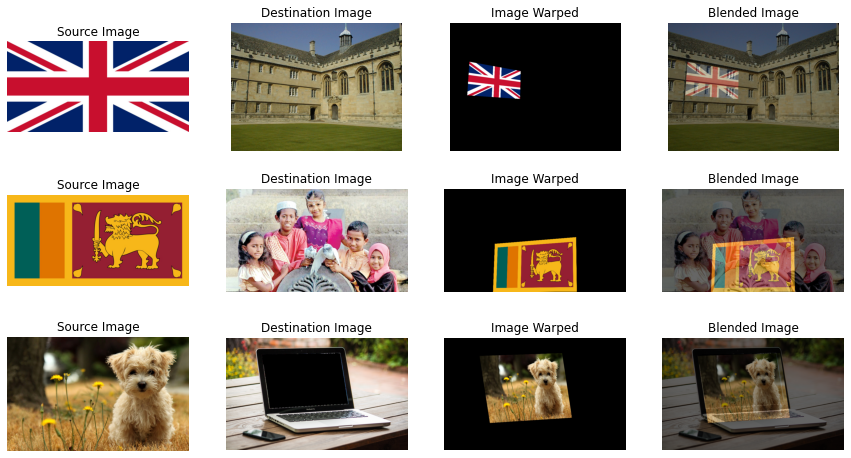

In [23]:
fig,ax=plt.subplots(3,4,figsize=(15,8))
ax[0][0].imshow(cv.cvtColor(img_s1,cv.COLOR_BGR2RGB))
ax[0][0].set_title("Source Image")
ax[0][0].axis("off")
ax[0][1].imshow(cv.cvtColor(img_d1,cv.COLOR_BGR2RGB))
ax[0][1].set_title("Destination Image")
ax[0][1].axis("off")
ax[0][2].imshow(cv.cvtColor(img_out1,cv.COLOR_BGR2RGB))
ax[0][2].set_title("Image Warped")
ax[0][2].axis("off")
ax[0][3].imshow(cv.cvtColor(blended_1,cv.COLOR_BGR2RGB))
ax[0][3].set_title("Blended Image")
ax[0][3].axis("off")
ax[1][0].imshow(cv.cvtColor(img_s2,cv.COLOR_BGR2RGB))
ax[1][0].set_title("Source Image")
ax[1][0].axis("off")
ax[1][1].imshow(cv.cvtColor(img_d2,cv.COLOR_BGR2RGB))
ax[1][1].set_title("Destination Image")
ax[1][1].axis("off")
ax[1][2].imshow(cv.cvtColor(img_out2,cv.COLOR_BGR2RGB))
ax[1][2].set_title("Image Warped")
ax[1][2].axis("off")
ax[1][3].imshow(cv.cvtColor(blended_2,cv.COLOR_BGR2RGB))
ax[1][3].set_title("Blended Image")
ax[1][3].axis("off")
ax[2][0].imshow(cv.cvtColor(img_s3,cv.COLOR_BGR2RGB))
ax[2][0].set_title("Source Image")
ax[2][0].axis("off")
ax[2][1].imshow(cv.cvtColor(img_d3,cv.COLOR_BGR2RGB))
ax[2][1].set_title("Destination Image")
ax[2][1].axis("off")
ax[2][2].imshow(cv.cvtColor(img_out3,cv.COLOR_BGR2RGB))
ax[2][2].set_title("Image Warped")
ax[2][2].axis("off")
ax[2][3].imshow(cv.cvtColor(blended_3,cv.COLOR_BGR2RGB))
ax[2][3].set_title("Blended Image")
ax[2][3].axis("off")

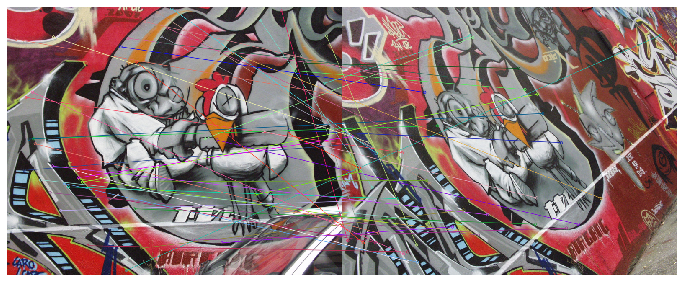

In [9]:
#question3
#https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/
import cv2 as cv
import matplotlib.pyplot as plt
img_1 = cv.imread('img1.ppm')
img_2 = cv.imread('img4.ppm')

img_3 = cv.cvtColor(img_1,cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(img_2,cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img_3,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img_4,None)

#feature matching
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img_match = cv.drawMatches(img_1, keypoints_1, img_2, keypoints_2, matches[:50], img_2, flags=2)
fig, ax = plt.subplots(figsize = (12,12))
ax.axis('off')
plt.imshow(cv.cvtColor(img_match,cv.COLOR_BGR2RGB))
plt.show()


In [10]:
import numpy as np
import random

In [11]:
#3(b)
#https://github.com/hughesj919/HomographyEstimation/blob/master/Homography.py

def calculateHomography(correspondences):
    #loop through correspondences and create assemble matrix
    aList = []
    for corr in correspondences:
        p1 = np.matrix([corr.item(0), corr.item(1), 1])
        p2 = np.matrix([corr.item(2), corr.item(3), 1])

        a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),
              p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
        a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,
              p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
        aList.append(a1)
        aList.append(a2)

    matrixA = np.matrix(aList)

    #svd composition
    u, s, v = np.linalg.svd(matrixA)

    #reshape the min singular value into a 3 by 3 matrix
    h = np.reshape(v[8], (3, 3))

    #normalize and now we have h
    h = (1/h.item(8)) * h
    return h
def geometricDistance(correspondence, h):

    p1 = np.transpose(np.matrix([correspondence[0].item(0), correspondence[0].item(1), 1]))
    estimatep2 = np.dot(h, p1)
    estimatep2 = (1/estimatep2.item(2))*estimatep2

    p2 = np.transpose(np.matrix([correspondence[0].item(2), correspondence[0].item(3), 1]))
    error = p2 - estimatep2
    return np.linalg.norm(error)
    
def ransac(points):
    maxInliers = []
    finalH = None
    for i in range(1000):

        random_points = []
        random_nums = random.sample(range(1, len(points)), 4)
        for i in random_nums:
            random_points.append(points[i])

        #call the homography function on those points
        h = calculateHomography(random_points)
        inliers = []

        for i in range(len(points)):
            d = geometricDistance(points[i], h)
            if d < 5:
                inliers.append(points[i])

        if len(inliers) > len(maxInliers):
            maxInliers = inliers
            finalH = h
        

        if len(maxInliers) > (len(maxInliers)):
            maxInliers = inliers
            final_H = h
    return finalH, maxInliers
correspondenceList = []
keypoints = [keypoints_1,keypoints_2]
for match in matches:
    (x1, y1) = keypoints[0][match.queryIdx].pt
    (x2, y2) = keypoints[1][match.trainIdx].pt
    correspondenceList.append([x1, y1, x2, y2])

correspondenceMatrix = np.matrix(correspondenceList)
finalH, inliers = ransac(correspondenceMatrix)
print (finalH)

[[ 7.17359422e-01  7.12970347e-01 -4.49280165e+01]
 [-1.11352948e-01  1.02578322e+00  1.35868818e+02]
 [ 4.99637770e-04  2.87289927e-05  1.00000000e+00]]


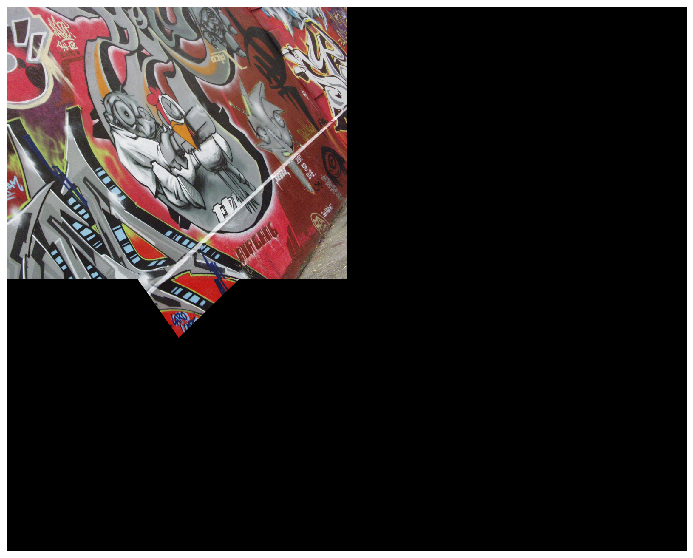

In [12]:
width = img_1.shape[1] + img_2.shape[1]
height = img_1.shape[0] + img_2.shape[0]

result = cv.warpPerspective(img_1, finalH, (width, height))
result[0:img_2.shape[0], 0:img_2.shape[1]] = img_2

plt.figure(figsize=(15,10))
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

plt.axis('off')
plt.show()